In [2]:
import random
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm
from scipy.stats import binom

from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel

from scipy.stats import chisquare
from scipy.stats import fisher_exact
from scipy.stats import f_oneway


from scipy.stats import probplot
from scipy.stats import shapiro
from scipy.stats import ranksums
from scipy.stats import wilcoxon

from scipy.stats import spearmanr
from scipy.stats import pearsonr

import statsmodels.stats as sm
import statsmodels.stats.power as pwr
import statsmodels.api as smapi

from IPython.display import Image
from IPython.display import YouTubeVideo
import warnings
warnings.filterwarnings('ignore')

sns.set(style="ticks", palette="pastel")
%matplotlib inline

In [ ]:
# Definitions of P-Value

"""
The p-value is the probability of
getting the observed value of the test statistic
or a value with even greater evidence against H0(Null Hypothesis),
if the H0(Null Hypothesis) is actually true
"""


"""
A p-value is the probability that random chance 
generated 
    the observed data/prob of event of interest
    or(+) something else that is equal
    or(+) something else that is rarer
"""

"""
p-value is the probability that, 
    if the null hypothesis were true
    what are the chances that samplying variation
    would produce an estimate that is further away
    from the hypothesised value.
"""

In [ ]:
weight = [random.randrange(65,85,1) for i in range(20)]
height = [random.randrange(139,185,1) for i in range(20)]
sample = ["A" if i < 10 else 'B' for i in range(20)]

_dict = {'sample': sample, 'weight': weight, 'height': height}  
df = pd.DataFrame(_dict)

# Scatter Plot
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax = sns.scatterplot(x="height", y="weight", hue="sample",data=df)

# Box Plot
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
sns.boxplot(x="sample", y="weight",data=df)

# Box Plot
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
sns.boxplot(x="sample", y="height",data=df);

# Ploting KDE's
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
sns.kdeplot(df[df['sample'] == "A"].height, shade=True)
sns.kdeplot(df[df['sample'] == "B"].height, shade=True)
plt.legend(title='height', loc='upper left', labels=['Sample A', 'Sample B']);

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
sns.kdeplot(df[df['sample'] == "A"].weight, shade=True)
sns.kdeplot(df[df['sample'] == "B"].weight, shade=True)
plt.legend(title='weight', loc='upper left', labels=['Sample A', 'Sample B']);

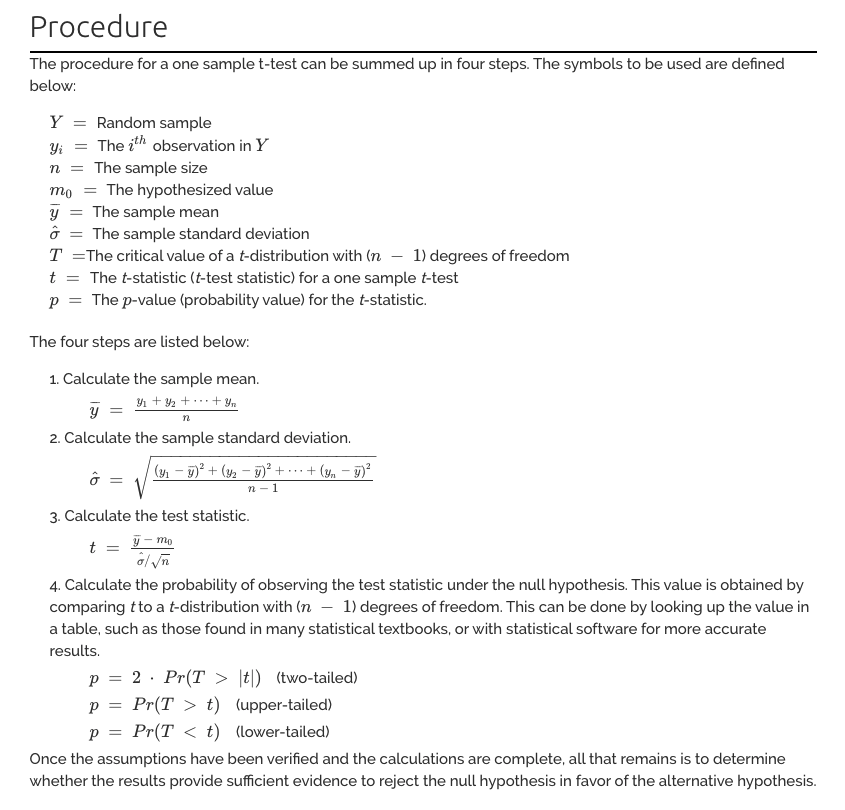

In [3]:
Image("./ttest.png")

In [ ]:
# One-sample: Mean of population different from a given value?
# Two-sample: Two means equal?
# T-test = Compare means of continuous variables


# One Sample T-test
weight = [random.randrange(65,85,1) for i in range(20)]
height = [random.randrange(139,185,1) for i in range(20)]
sample = ["A" if i < 10 else 'B' for i in range(20)]
_dict = {'sample': sample, 'weight': weight, 'height': height}  

df = pd.DataFrame(_dict)
sample_a = df[df['sample'] == "A"]
sample_b = df[df['sample'] == "B"]


# Perform t-test and print result
t_result = ttest_1samp(sample_a.height, 65)
print(t_result)


# Test significance
alpha= 0.05
if (t_result[1] < alpha):
    print("mean value of Sample A differs from given value")
else:
    print("No significant difference found")


In [ ]:
# One Sample T-test

country = [f'country_{i}' for i in range(213)]
sex_ratio = norm.rvs(size=213, loc=96.008511, scale=4.898395)
_dict = {'country': country, 'sex_ratio': sex_ratio}
df = pd.DataFrame(_dict)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
sns.kdeplot(df.sex_ratio, shade=True)

# Perform the one-sample t-test
t_result= ttest_1samp(df.sex_ratio, 100)
print(t_result)

# Test significance
alpha = 0.05
if t_result[1] < alpha:
    print("Sex ratios are significantly biased")
else:
    print("No significant bias found")

In [ ]:
# Two - Sample Test

country_a = [f'country_{i}' for i in range(213)]
sex_ratio_a = norm.rvs(size=213, loc=100, scale=4.898395)
_dict = {'country': country_a, 'sex_ratio': sex_ratio_a}
df_a = pd.DataFrame(_dict)

country_b = [f'country_{i}' for i in range(213)]
sex_ratio_b = norm.rvs(size=213, loc=110, scale=4.898395)
_dict = {'country': country_b, 'sex_ratio': sex_ratio_b}
df_b = pd.DataFrame(_dict)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
sns.kdeplot(df_a.sex_ratio, shade=True)
sns.kdeplot(df_b.sex_ratio, shade=True)
plt.legend(title='sex_ratio', loc='upper left', labels=['Europe', 'Asia']);

# Perform the two-sample t-test
t_result= ttest_ind(df_a.sex_ratio, df_b.sex_ratio)
print(t_result)

# Test significance
alpha= 0.05
if (t_result[1] < alpha):
    print("Europe(df_a) and Asia(df_b) have different mean sex ratios")
else: print("No significant difference found")

In [ ]:
# Perform Chi-square test - Test of Proportion
# Chi-square: Examine proportions of discrete categories
# H0 : Observed outcomes fit distribution
# H1 : Observed outcomes doesn't fit distribution

gender = ["M" if binom.rvs(n=1, size=1, p=.5)==1 else "F" for i in range(200)]
_dict = {'gender': gender}
df = pd.DataFrame(_dict)
sex_ratio = df.gender.value_counts()
sex_ratio

chi= chisquare(sex_ratio)
print(chi)

# Test significance
alpha= 0.05
if chi[1] < alpha:
    print("Difference between sexes is statistically significant")
else:
    print("No significant difference between sexes found")

In [ ]:
# A Fisher exact test is a useful way to compare proportions of samples falling into discrete categories.
# Fisher exact test:Examine proportions of discrete categories
# Two-sample version of Chi-square test
# H0 : two samples have the same distribution
# H1 : two samples doesn't not have the same distribution

medal_if = [True if binom.rvs(n=1, size=1, p=.1)==1 else False for i in range(4000)]
sports = [random.choice(["swimming", "athletics"]) for i in range(4000)]
_dict = {'sports': sports, 'medal_if':medal_if}
df = pd.DataFrame(_dict)

# Create a table of cross-tabulations
table = pd.crosstab(df.medal_if, df.sports)

# Perform the Fisher exact test
fisher = fisher_exact(table, alternative='two-sided')
print(fisher)

# Is the result significant?
alpha = 0.05
if fisher[1] < alpha:
    print("Proportions of medal winners differ significantly")
else:
    print("No significant difference in proportions of medal winners found")

In [ ]:
# Run the Correlation Test

year = [random.randrange(1958,2017,1) for i in range(84)]
weight = norm.rvs(size=84, loc=74, scale=8)

_dict = {'year': year, 'weight': weight}
df = pd.DataFrame(_dict)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax = sns.scatterplot(x="year", y="weight", data=df)

pearson = pearsonr(df.weight, df.year)
print(pearson)

# Test if p-value is bigger or smaller than alpha
alpha = 0.05
if pearson[1] < alpha:
    print("Weights and year are significantly correlated")
else:
    print("No significant correlation found")

In [ ]:
# Exploring confounding variables
# ------------------------------
# In statistics, a confounder is a variable that influences both the dependent variable and 
# independent variable, causing a spurious association. Confounding is a causal concept, 
# and as such, cannot be described in terms of correlations or associations.


# Do exploratory data analysis (EDA) to better understand confounding variables. 
# Once again, we'll be looking at trends in weights of Olympic athletes from the athletes DataFrame. 
# We are interested in possible differences between the weights of athletes from different countries, 
# which may be more difficult to determine than it seems.

# Are apparent differences between countries due to real differences between the countries, 
# or might they be caused by something else within the data? Exploratory data analysis will help! 

df = pd.read_csv(r'/Users/ronniejoshua/Desktop/athlete_events.csv')
df = df.loc[df.Team.isin(['Kenya', 'Ethiopia']), :]
df = df.loc[df.Sport.isin(['Athletics', 'Swimming']), :]
df = df[['Weight', 'Team', 'Sport']]
df.Team.value_counts()

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
sns.boxplot(x="Team", y="Weight",data=df);

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
sns.boxplot(x="Sport", y="Weight",data=df);

# Create crosstabulation & print table
table = pd.crosstab(df.Team,df.Sport)
print(table)

In [ ]:
# Finding confounding variables

df = pd.read_csv('./undata_country_profile_variables.csv')
# # regions = [reg for reg in list(df.Region.unique())]
df = df[['Region', 'GDP per capita (current US$)', 'Life expectancy at birth (females/males, years)', 'Unemployment (% of labour force)']]
df.columns = ['region', 'gdp_per_capita', 'life_expectancy', 'unemployment_rate']
df = df.dropna(axis='index')

match = list()
for reg in list(df.region.unique()):
    if "Asia" in reg or "Europe" in reg:
        match.append(reg)
        
df = df.loc[df.region.isin(match), :]
df['avg_life_xpectancy'] = df.life_expectancy.apply(lambda x : sum([float(i) for i in x.split("/")])/2)
df['new_region'] = df.region.apply(lambda x: "Asia" if str(x).find("Asia") == -1 else "Europe")
df_asia = df.loc[df.new_region.isin(['Asia']), :]
df_europe = df.loc[df.new_region.isin(['Europe']), :]


# Life expectancy density plot
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax = ax.set_xlim(min(df.avg_life_xpectancy), max(df.avg_life_xpectancy))
sns.kdeplot(df_asia.avg_life_xpectancy, shade=True)
sns.kdeplot(df_europe.avg_life_xpectancy, shade=True)

# GDP vs life expectancy scatter plot
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax = sns.scatterplot(x="gdp_per_capita", y="avg_life_xpectancy", data=df)


# GDP density plot
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax = ax.set_xlim(0, max(df.gdp_per_capita))
sns.kdeplot(df_asia.gdp_per_capita, shade=True)
sns.kdeplot(df_europe.gdp_per_capita, shade=True)

In [ ]:
# Random sampling

# You have been provided with a large dataset (athletes) containing the details of a large number 
# of American athletes. For the purposes of this exercise, we are interested in differences between 
# the body Weight of competitors in swimming and athletics. In order to test this, you'll be using 
# a two-sample t-test. However, you will be performing this test on a random sample of the data. 
# By playing with the random subset chosen, you'll see how randomness affects the results. 
# You will need to extract a random subset of athletes from each event in order to run your test. 

# Define random seed
seed = 0000

df = pd.read_csv('./athlete_events.csv')
df = df.loc[df.Team.isin(['United States']), :]
df = df.loc[df.Sport.isin(['Athletics', 'Swimming']), :]
df = df[['Weight', 'Team', 'Sport', 'Sex']]
df = df.dropna(axis='index')

# Create two subsets, one for the athletics competitors and one for the swimmers
subsetathl = df[df.Sport == "Athletics"].sample(n=30, random_state= seed)
subsetswim = df[df.Sport == "Swimming"].sample(n=30, random_state= seed)

# Perform the two-sample t-test
t_result = ttest_ind(subsetathl.Weight, subsetswim.Weight) 
print(t_result)

# Define random seed
seed = 2397

# Create two subsets, one for the athletics competitors and one for the swimmers
subsetathl = df[df.Sport == "Athletics"].sample(n=30, random_state= seed)
subsetswim = df[df.Sport == "Swimming"].sample(n=30, random_state= seed)

# Perform the two-sample t-test
t_result = ttest_ind(subsetathl.Weight, subsetswim.Weight) 
print(t_result)


# Conclusion:
# -----------
# randomizing samples and you can see how choosing different random samples can give you different results. 
# Did you notice that your p-value changed when a different random sample was chosen? 
# Improving your approach to create a balanced dataset would help avoid this problem.

In [ ]:
# Blocking
# We're going to have another look at the same data but, this time, we'll use blocking to improve our approach. 
# Like last time, you'll be using a two-sample t-test on athlete Weight within your DataFrame. 
# This time, however, you will control for Sex as a blocking factor, sampling equally from male and female 
# participants. You will need to extract a random subset of athletes from both events to run your test. 

df = pd.read_csv('./athlete_events.csv')
df = df.loc[df.Team.isin(['United States']), :]
df = df.loc[df.Sport.isin(['Athletics', 'Swimming']), :]
df = df[['Weight', 'Team', 'Sport', 'Sex']]
df = df.dropna(axis='index')

seed = 9000

# Create subset blocks
subsetathlm = df[(df.Sport == "Athletics") & (df.Sex == "M")].sample(n=15, random_state= seed)
subsetathlf = df[(df.Sport == "Athletics") & (df.Sex == "F")].sample(n=15, random_state= seed)

subsetswimm = df[(df.Sport == "Swimming") & (df.Sex == "M")].sample(n=15, random_state= seed)
subsetswimf = df[(df.Sport == "Swimming") & (df.Sex == "F")].sample(n=15, random_state= seed)

# Combine blocks
subsetathl = pd.concat([subsetathlm, subsetathlf])
subsetswim = pd.concat([subsetswimm, subsetswimf])

# Perform the two-sample t-test
print(ttest_ind(subsetathl.Weight, subsetswim.Weight))

# Conclusion
# -----------
# Your t-test is significant, with a p-value under 0.05. This blocked design has resolved the issue 
# you had in the last exercise. You can see how this type of blocking approach can be a useful way 
# to improve your experimental design when a confounding variable is present.

In [ ]:
# Paired t-test

# Here, you've been provided with a small DataFrame containing information on 10 Fields. 
# We are interested in potato yield in tons/hectare. For each Field, we have a value for 
# its Yield2018, before the application of a new fertilizer, and its Yield2019, after the 
# application of the new fertilizer. You'll need to perform two t-tests, 
    # a standard two-sample test, and 
    # a paired t-test. A paired t-test will control for the variation between fields. 
    
# Do the two tests give the same result? 

# Difference betwen Two-Sample T-Test and Pairded T-Test
# -------------------------------------------------------
# Two-sample t-test is used when the data of two samples are statistically independent, 
# while the paired t-test is used when data is in the form of matched pairs. 
# There are also some technical differences between them.

field = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
yield_2018 = [60.2, 12.0, 13.8, 91.8, 50.0, 45.0, 32.0, 87.5, 60.1, 88.0]
yield_2019 = [63.2, 15.6, 14.8, 96.7, 53.0, 47.0, 31.3, 89.8, 67.8, 90.0]
_dict = {'field': field, 'yield_2018': yield_2018, 'yield_2019':yield_2019}
df = pd.DataFrame(_dict)

# Perform independent t-test
ttestind = ttest_ind(df.yield_2018,df.yield_2019)
ttestind

# Perform paired t-test
ttestpair = ttest_rel(df.yield_2018,df.yield_2019)
print(ttestpair)

# Conclusion:
# Recall, the paired test is more sensitive than the independent test and can pick up a difference 
# that the independent test can't detect. This is because the difference within the samples each 
# year (individual field effect) is quite large in comparison to the difference between the two 
# years (effect of treatment). Paired tests are useful when a large variability exists.

In [ ]:
YouTubeVideo('51QZa7b0Ozk')

In [ ]:
# One-way ANOVA

# How does the Weight of athletes vary between teams from different countries? 
# In this exercise, you're going to use a one-way ANOVA to check for the presence of significant 
# variation in Weight of Olympic athletes. 


df = pd.read_csv('./athlete_events.csv')
df = df.loc[df.Team.isin(['United States', 'China', 'France']), :]
df = df[['Weight', 'Team', 'Sport', 'Sex']]
df = df.dropna(axis='index')

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
sns.boxplot(x="Team", y="Weight",data=df);

# Create arrays
France_athletes = df[df.Team == "France"].Weight
US_athletes = df[df.Team == "United States"].Weight
China_athletes = df[df.Team == "China"].Weight

# Perform one-way ANOVA
anova = f_oneway(France_athletes, US_athletes, China_athletes)
print(anova)

In [ ]:
# Two-way ANOVA(Independent Factors/Variable) - Without Interaction Effect

# How does the Weight of athletes vary between teams from different countries and of different sexes? 
# In this exercise, you're going to use a two-way ANOVA to check for the presence of significant variation 
# in the Weight of Olympic sprinters.

# A two-way ANOVA will allow you to see which of these two factors, Sex and Team, have a significant 
# effect on Weight.

df = pd.read_csv('./athlete_events.csv')
df = df.loc[df.Team.isin(['United States', 'China']), :]
df = df.loc[df.Sport.isin(['Athletics']), :]
df = df[['Weight', 'Team', 'Sport', 'Sex']]
df = df.dropna(axis='index')

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
sns.boxplot(x="Team", y="Weight", hue = "Sex", data=df);

# Create model
formula = 'Weight ~ Sex + Team'
model = smapi.formula.ols(formula, data=df).fit()

# Perform ANOVA and print table
aov_table = smapi.stats.anova_lm(model, typ=2)
print(aov_table)

# Conclusion:
# -----------
# According to the results of your ANOVA, Sex has a significant effect, while Team has no significant effect. 
# ANOVA is a very powerful method, as it allows us to separate out the effects of multiple factors.

In [ ]:
YouTubeVideo('zGIH2JyQviI')

In [ ]:
# Two-way ANOVA with interactive effects
# --------------------------------------

# As in previous exercises, you'll be looking at the variation in athlete Weight. You're going to look at 
# athletes of either Sex competing in one of two Events: the 100 meter and 10,000 meter run. Have a look 
# at these data in the boxplots below.

# An ANOVA will allow you to work out which of these variables affect Weight and whether an interactive 
# effect is present. 


df = pd.read_csv('./athlete_events.csv')
extract = {
            "Athletics Men's 100 metres" : '100 Meters', 
            "Athletics Men's 10,000 metres": '10000 Meters', 
            "Athletics Women's 100 metres": '100 Meters', 
            "Athletics Women's 10,000 metres": '10000 Meters'}

match = list()
for event in list(df.Event.unique()):
    if event in list(extract.keys()):
        match.append(event)

        
di = {1: "A", 2: "B"}        
df = df.loc[df.Event.isin(match), :]
df = df[['Weight', 'Team', 'Event', 'Sex']]
df = df.dropna(axis='index')
df = df.replace({"Event": extract})

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
sns.boxplot(x="Event", y="Weight", hue = "Sex", data=df);


# Run the ANOVA
model = smapi.formula.ols('Weight ~ Sex + Event + Sex:Event', data = df).fit()

# Extract AOV table
aov_table = smapi.stats.anova_lm(model, typ=2)

# Print the table
print(aov_table)

# Look at the p-values for the effects of Sex, Event, and Sex:Event. 
# Using a standard alpha of 0.05, Sex, Event, and Sex:Event have a significant effect on Weight. 
# This means that both factors influence Weight, and the effect of one factor is dependent on the other.

In [ ]:
# Choosing an appropriate test

# Let's look at another problem from the Olympic dataset, focusing on the Height of the competitors. 
# Here, you've been provided with athletes data on the Norwegian and Colombian Team for each Sex. 
# With those two factors, you'll have four separate groups. First, look at the boxplots below, 
# then choose an appropriate statistical test.


df = pd.read_csv('./athlete_events.csv')
df = df.loc[df.Team.isin(['Norway', 'Colombia']), :]
df = df[['Height', 'Team', 'Sport', 'Sex']]
df = df.dropna(axis='index')

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
sns.boxplot(x="Team", y="Height", hue = "Sex", data=df);

# Create model
formula = 'Height ~ Sex + Team + Sex:Team'
model = smapi.formula.ols(formula, data=df).fit()

# Perform ANOVA and print table
aov_table = smapi.stats.anova_lm(model, typ=2)
print(aov_table)

In [ ]:
# Type I error : find difference where none exists
# Type II error : fail to find difference that does exist

# Bonferroni correction
# ---------------------
# The Bonferroni correction is appropriate when a single false positive in a set of tests would be a problem. 
# It is mainly useful when there are a fairly small number of multiple comparisons and 
# you're looking for one or two that might be significant.

# Illustration:
# -------------
# Improved nutrition and healthcare has lead to increased human heights in most societies over the past century. 
# But is this trend also reflected amongst elite athletes? To examine this, we'll be looking at another slice 
# from our Olympic dataset and performing multiple tests.

# You have been provided with the athletes dataset containing information about American male Olympic athletes 
# from three years: 1924, 1952, and 2016. You will perform two-sample t-tests to compare the three timepoints, 
# seen in boxplots. Between which times do significant differences exist? As you'll be performing multiple 
# non-independent tests, you will need to perform Bonferroni correction on the results.

df = pd.read_csv('./athlete_events.csv')
df = df[['Year', 'Height']]
df = df.dropna(axis='index')
df.head()

# Perform three two-sample t-tests 
t_result_1924v2016= ttest_ind(df[df.Year == 1924].Height, df[df.Year == 2016].Height)
t_result_1952v2016= ttest_ind(df[df.Year == 1952].Height, df[df.Year == 2016].Height)
t_result_1924v1952= ttest_ind(df[df.Year == 1924].Height, df[df.Year == 1952].Height)

# Create an array of p-value results
pvals_array = [t_result_1924v2016[1],t_result_1952v2016[1],t_result_1924v1952[1]]
print(pvals_array)

# Perform Bonferroni correction
adjustedvalues = sm.multitest.multipletests(pvals_array, alpha=0.05, method='b')
print(adjustedvalues)

In [ ]:
# The Šidák correction is a method for controlling the Family-Wise Error Rate (FWER) in the strong sense and 
# it is only slightly less conservative than the most conservative Bonferroni correction. This test produces 
# a familywise Type I error rate of exactly α when the tests are independent from each other and all null 
# hypotheses are true. For positively-correlated tests the procedure is conservative and it is liberal for 
# negatively-correlated tests.

# In practice the Šidák correction a good method when one compares two or more groups across a range of 
# metrics, for example comparing bounce rate, conversion rate, average revenue per user and average site 
# speed and considering each of the comparisons enough to make a call on the test. The correction is 
# usually implemented by using the Šidák Step-Down procedure.

# We're looking at how the Height of Olympic athletes from the athletes dataset has changed over time. 
# In this exercise, we're considering three events, the 100 meter, the High Jump, and the Marathon. 
# You'll be examining the correlation between Height and Year separately for each Event. As you did before, 
# you'll need to correct for multiple hypothesis tests, but, since these tests are independent, you can 
# use the less-strict Šídák correction.

df = pd.read_csv('./athlete_events.csv')
df = df[['Height', 'Year', 'Event']]

# ["100 meters", "High Jump", "Marathon"]
def code_event(event):
    for ev in ["High Jump", "100 metres", "Marathon"]:
        if str(ev) in event:
            return str(ev)
        
df['_Event'] = df['Event'].apply(code_event)
df = df.dropna(axis='index')


# Perform Pearson correlations
pearson100 = pearsonr(df[df._Event == '100 metres'].Height, df[df._Event == '100 metres'].Year)
pearsonHigh = pearsonr(df[df._Event == 'High Jump'].Height, df[df._Event == 'High Jump'].Year)
pearsonMara = pearsonr(df[df._Event == 'Marathon'].Height, df[df._Event == 'Marathon'].Year)

# Create array of p-values
pvals_array = [pearson100[1],pearsonHigh[1],pearsonMara[1]]
print(pvals_array)

# Perform Šídák correction
adjustedvalues=  sm.multitest.multipletests(pvals_array, alpha=0.05, method='s')
print(adjustedvalues)

In [ ]:
# Effect of sample size on the results of statistical tests. 

df = pd.read_csv('./athlete_events.csv')
df = df.loc[df.Sport.isin(['Athletics', 'Swimming']), :]
df = df[['Weight', 'Sport']]
df = df.dropna(axis='index')

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
sns.boxplot(x="Sport", y="Weight", data=df);



# Create subset with defined random seed and perform t-test
subset = df.sample(n=50, random_state= 1007)
print(ttest_ind(subset[subset.Sport == "Athletics"].Weight, 
                      subset[subset.Sport == "Swimming"].Weight))


# Create sample with defined random seed and perform t-test
subset = df.sample(n=200, random_state= 1007)
print(ttest_ind(subset[subset.Sport == "Athletics"].Weight, 
                      subset[subset.Sport == "Swimming"].Weight))


# Create sample with defined random seed and perform t-test
subset = df.sample(n=1000, random_state= 1007)
print(ttest_ind(subset[subset.Sport == "Athletics"].Weight, 
                      subset[subset.Sport == "Swimming"].Weight))


In [ ]:
# Determine the sample size we would need to have an 80% chance of detecting a small (0.4) difference between 
# these two samples. 

# Set parameters
effect = 0.4
power = 0.8
alpha = 0.05

# Calculate sample ratio
swimmercount = float(len(df[df.Sport == "Swimming"].index))
athletecount = float(len(df[df.Sport == "Athletics"].index))
sample_ratio = swimmercount/athletecount

# Initialize analysis and calculate sample size
analysis = pwr.TTestIndPower()
ssresult = analysis.solve_power(effect_size=effect, power=power, alpha=alpha, nobs1=None, ratio=sample_ratio)
print(ssresult)

In [ ]:
# Calculating the Minimum Detectable Effect Size

# Calculate the effect sizes we are able to detect for a couple of different sampling strategies. 
# First, you'll determine the smallest effect size detectable using the complete dataset. 

# Set parameters
alpha = 0.05
power = 0.8
sample_ratio = float(len(df[df.Sport == "Swimming"])) / len(df[df.Sport == "Athletics"])
samp_size = len(df[df.Sport == "Athletics"])

# Initialize analysis & calculate sample size
analysis = pwr.TTestIndPower()
esresult = analysis.solve_power(effect_size = None, 
                                power = power, 
                                nobs1 = samp_size, 
                                ratio = sample_ratio, 
                                alpha = alpha)
print(f'With sample size of {samp_size} we can have a minimum detectable effect of {esresult}')


# Then, in Step 2, you'll determine the size effect we could detect using 300 sample obs from each Sport.

# Set parameters
alpha = 0.05
power = 0.8
ratio = float(len(df[df.Sport == "Swimming"])) / len(df[df.Sport == "Athletics"])
samp_size = 300

# Initialize analysis & calculate sample size
analysis = pwr.TTestIndPower()
esresult = analysis.solve_power(effect_size = None, 
                                power = power, 
                                nobs1 = samp_size, 
                                ratio = ratio, 
                                alpha = alpha)
print(f'With sample size of {samp_size} we can have a minimum detectable effect of {esresult}')

In [ ]:
# Computing Cohen's d
# -------------------
# Cohen's d is an effect size used to indicate the standardised difference between two means. 
# It can be used, for example, to accompany reporting of t-test and ANOVA results. It is also 
# widely used in meta-analysis. Cohen's d is an appropriate effect size for the comparison 
# between two means.


# Cohen suggested that 
    # d=0.2 be considered a 'small' effect size, 
    # d=0.5 represents a 'medium' effect size and 
    # d=0.8 a 'large' effect size. 
# This means that if two groups' means don't differ by 0.2 standard deviations or more, 
# the difference is trivial, even if it is statistically signficant.

# Now, using the same comparison of Weight difference between Sports, let's calculate the actual effect 
# size for this comparison. As a reminder, these data are summarized in the boxplot below.

# Create series
athl_weight = df[df.Sport == "Athletics"].Weight 
swim_weight = df[df.Sport == "Swimming"].Weight

# Calculate difference between means and pooled standard deviation
diff = abs(swim_weight.mean() - athl_weight.mean() )
pooledstdev = math.sqrt((athl_weight.std()**2 + swim_weight.std()**2)/2 )

# Calculate Cohen's d
cohend = diff / pooledstdev
print(cohend)

In [ ]:
# Effect size for a Fisher exact test

df = pd.read_csv('./athlete_events.csv')
df = df.loc[df.Team.isin(['United States']), :]
df = df.loc[df.Sport.isin(['Athletics', 'Swimming']), :]
df = df[['Medal', 'Sport']]
df['MedalTF'] = df['Medal'].apply(lambda x: True if x in ['Gold', 'Silver', 'Bronze'] else False)


# Create a table of cross-tabulations
table = pd.crosstab(df.MedalTF, df.Sport)
print(table)

# Perform the Fisher exact test
chi = fisher_exact(table, alternative='two-sided')
print(chi)

# Print p-value
print("p-value of test: " + str(round(chi[1], 5))  )

# Print odds ratio
print("Odds ratio between groups: " + str(round(chi[0], 1))  )

In [ ]:
# Effect sizes for Pearson correlation
df = pd.read_csv('./athlete_events.csv')
df = df.loc[df.Team.isin(['Kenya', 'Ethiopia']), :]
df = df.loc[df['Event'].apply(lambda x: True if "10,000" in x else False)]
df = df[['Team', 'Weight', 'Height']]
df = df.dropna(axis='index')

ken_weights = df[df.Team == "Kenya"].Weight
ken_heights = df[df.Team == "Kenya"].Height

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax = sns.scatterplot(x=ken_weights, y=ken_heights)

# Perform Pearson correlation
pearsonken = pearsonr(ken_weights , ken_heights)
print(pearsonken)


eth_weights = df[df.Team == "Ethiopia"].Weight
eth_heights = df[df.Team == "Ethiopia"].Height

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax = sns.scatterplot(x=eth_weights, y=eth_heights)

# Perform Pearson correlation
pearsonken = pearsonr(eth_weights , eth_heights )
print(pearsonken)

In [ ]:
# Illustration -  Power Analysis - T Test - True Positive

# Knowing the effect size of the difference between two groups, you need to work out what the odds 
# are that your t-test will pick up this difference. 

# Set parameters
effect_size = 0.42145
alpha = 0.05
samp_size = 100
ratio = 1

# Initialize analysis & calculate power
analysis = pwr.TTestIndPower()
pwresult = analysis.solve_power(effect_size=effect_size, power=None, alpha=alpha, nobs1=samp_size, ratio=ratio)
print(pwresult)

In [ ]:
# Interpreting power analyses

# You are planning to run a t-test, comparing the production of 20 potato fields treated with 
# fertilizer A versus 20 treated with fertilizer B.
        
# You perform a two-sample t-test, comparing the production of the fields treated with fertilizer A 
# versus those treated with fertilizer B. You obtain the following result:

# Ttest_indResult(statistic=-1.4077611103176186, pvalue=0.16733016968700729)

# Using an alpha of 0.05, you classify the result of the t-test as not significant, indicating no 
# difference between the fertilizers. You then perform a power analysis, 
# using an effect_size of 0.6 (this is the smallest effect size that you would consider worthwhile), 
# an alpha of 0.05 and the same sample size (20 fields each treatment) used for the t-test.


# Set parameters
effect_size = 0.6
alpha = 0.05
samp_size = 20
ratio = 1

# Initialize analysis & calculate power
analysis = pwr.TTestIndPower()
pwresult = analysis.solve_power(effect_size=effect_size, power=None, alpha=alpha, nobs1=samp_size, ratio=ratio)
print(pwresult)

# While the t-test returned a negative, our power analysis indicates that this test may not be 
# capable of detecting a difference of interest. We are thus unable to draw a firm conclusion.

In [ ]:
# Exploring distributions with summary stats

df = pd.read_csv('./undata_country_profile_variables.csv')
df = df[['GDP per capita (current US$)', 'Unemployment (% of labour force)']]
df.columns = ['gdp_per_capita', 'unemployment']
df = df.dropna(axis='index')
df = df.loc[~df.unemployment.isin(['...']), :]
df.unemployment = df.unemployment.astype(float)


fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
sns.kdeplot(df.unemployment, shade=True);


fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
sns.kdeplot(df.gdp_per_capita, shade=True);

In [ ]:
# Examine the normality of a distribution is with a Q-Q (quantile-quantile) plot.

# Calculate theoretical quantiles
# -------------------------------
tq = probplot(df.unemployment, dist="norm")

# # Create Q-Q plot using statsmodel Library
# sm.qqplot(tq[0][0])
# plt.show()

# Create Dataframe
_df = pd.DataFrame(
                    data= {
                            'Theoretical Quantiles': tq[0][0], 
                            "Ordered Values(Unemployment)": df.unemployment.sort_values() 
                          }
                 )

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax = sns.scatterplot(x="Theoretical Quantiles", y="Ordered Values(Unemployment)", data=_df)

# Calculate theoretical quantiles
# -------------------------------
tq = probplot(df.gdp_per_capita, dist="norm")

# # Create Q-Q plot using statsmodel Library
# sm.qqplot(tq[0][0])
# plt.show()

# Create Dataframe
_df = pd.DataFrame(
                    data= {
                            'Theoretical Quantiles': tq[0][0], 
                            "Ordered Values(GDP Per Capita)": df.gdp_per_capita.sort_values() 
                          }
                 )

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax = sns.scatterplot(x="Theoretical Quantiles", y="Ordered Values(GDP Per Capita)", data=_df)



# Shapiro-Wilk test to examine whether the distribution of values seen in these samples, 
# as seen in the Q-Q plots below, departs significantly from the normal distribution. 

# Perform Shapiro-Wilk test on Unemployment and print result
shapiroUnem = shapiro(df.unemployment)
print(shapiroUnem)


# Perform Shapiro-Wilk test on Unemployment and print result
shapiroGDP = shapiro(df.gdp_per_capita)
print(shapiroGDP)

In [ ]:
# The Wilcoxon matched-pairs signed-rank test is a nonparametric method to compare before-after, 
# or matched subjects. It is sometimes called simply the Wilcoxon matched-pairs test.

# The Wilcoxon signed rank test is a nonparametric test that compares the median of a set 
# of numbers against a hypothetical median.

# The Wilcoxon rank sum test is a nonparametric test to compare two unmatched groups. 
# It is equivalent to the Mann-Whitney test.

# Difference betwen Two-Sample T-Test and Pairded T-Test
# -------------------------------------------------------
# Two-sample t-test is used when the data of two samples are statistically independent, 
# while the paired t-test is used when data is in the form of matched pairs. 
# There are also some technical differences between them.

In [ ]:
# Two Sample T-test comparing Asian and European sex ratios
# Perform Wilcoxon rank-sum test

# The Wilcoxon rank sum test is a nonparametric test to compare two unmatched groups. 
# It is equivalent to the Mann-Whitney test.

europe_sex_ratio = [
    101.9,  102.3,   96.2,   87.0,   97.3,   96.4,   94.6,   98.4,   93.1,   96.7,   99.0,   88.2,  107.2,   
    97.2,   96.7,   97.0,  101.8,   96.9,  219.2,   90.7,  100.7,   98.4,   98.2,   95.1,   84.9,   98.4,   
    85.4,  101.0,  100.9,   94.7,   97.4,   99.0,  101.8,   93.4,   89.8,   92.2,   94.0,   86.8,   94.9,   
    95.6,   94.6,   98.6,   96.2,  100.2,   98.2,  100.0,   86.0,   97.4
 ]
asia_sex_ratio = [
                  106.3, 88.8, 99.3,168.3,101.7,113.1, 85.1, 92.3,106.3,100.2, 95.7, 91.4,107.6,101.2,
                  102.5, 98.7, 95.4,102.6,134.9,100.6,131.8, 97.9, 94.3,192.8,105.6,301.2,100.2,132.9, 
                  92.5,102.9,102.1, 97.0,262.4,226,102.1
]

print(ttest_ind(europe_sex_ratio, asia_sex_ratio))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
sns.kdeplot(europe_sex_ratio, shade=True)
sns.kdeplot(asia_sex_ratio, shade=True)
plt.legend(title='sex_ratio', loc='upper right', labels=['europe_sex_ratio', 'asia_sex_ratio'])

# You used a t-test to compare these two samples and found a significant difference (t_result).
# given that these samples are not normally distributed, a Wilcoxon rank-sum test would be more appropriate.

# Does the sex ratio differ between continents?

# Look at the p-values from the Wilcoxon test. Note that they are actually lower (more significant) than 
# those for the t-test. This is because the rank-sum test is less sensitive to outliers.

# Perform Wilcoxon rank-sum test
wilc = ranksums(europe_sex_ratio, asia_sex_ratio)
print(wilc)

In [ ]:
# Two Sample T-test comparing Yield of Fields Between Two Years
# Perform paired t-test
# Perform Wilcoxon Signed-Rank test

field = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O']
yield_2018 = [60.2, 12.0, 13.8, 91.8, 50.0, 45.0, 32.0, 87.5, 60.1, 88.0, 11.3, 10.7, 12.7, 15.9, 16.0]
yield_2019 = [63.2, 15.6, 14.8, 96.7, 53.0, 47.0, 31.3, 89.8, 67.8, 90.0, 14.2, 12.0, 13.9, 17.8, 20.0]
_dict = {'field': field, 'yield_2018': yield_2018, 'yield_2019':yield_2019}
df = pd.DataFrame(_dict)


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
sns.kdeplot(yield_2018, shade=True)
sns.kdeplot(yield_2019, shade=True)
plt.legend(title='yields', loc='upper right', labels=['yield_2018', 'yield_2019'])

# Perform Shapiro-Wilks tests
shap2018 = shapiro(yield_2018)
shap2019 = shapiro(yield_2019)
print(shap2018)
print(shap2019)

# Perform paired t-test
ttestpair = ttest_rel(df.yield_2018, df.yield_2019)
print(ttestpair)


# Perform Wilcoxon Signed-Rank test
wilcsr = wilcoxon(df.yield_2018,df.yield_2019)
print(wilcsr)

# Note that both of your Shapiro-Wilks tests gave significant results, 
# indicating non-normal distributions. The Wilcoxon test gives a 
# higher p-value for the same data, due to its lower sensitivity. 
# However, due to the low sample sizes and non-normal distributions, 
# the Wilcoxon test is a better choice of test for this dataset.

In [ ]:
# Parametric vs non-parametric tests
# Do these two distributions look normal or not? First, we'll test whether these sets of samples follow 
# a normal distribution, via a couple of Shapiro-Wilks tests. Then we'll choose what statistical test to use. 
# Finally, we'll test the difference between the Norwegian and Chinese samples.

# illustration
df = pd.read_csv('./athlete_events.csv')
df = df.loc[df.Team.isin(['Norway', 'China']), :]
df = df[['Team', 'Weight', 'Height']]
df = df.dropna(axis='index')

# Separate the heights by country
NorwayHeights = df[df['Team'] == "Norway"].Height
ChinaHeights = df[df['Team'] == "China"].Height


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
sns.kdeplot(NorwayHeights, shade=True)
sns.kdeplot(ChinaHeights, shade=True)
plt.legend(title='Heights', loc='upper right', labels=['NorwayHeights', 'ChinaHeights'])


# Shapiro-wilks test on the heights
print(shapiro(NorwayHeights)[1])
print(shapiro(ChinaHeights)[1])

# The Wilcoxon rank sum test is a nonparametric test to compare two unmatched groups. 
# It is equivalent to the Mann-Whitney test.

# Perform the Wilcoxon rank-sum test
wilc = ranksums(NorwayHeights, ChinaHeights)
print(wilc)  

In [ ]:
# Perform Pearson and Spearman correlations
# -----------------------------------------
# The Pearson correlation evaluates the linear relationship between two continuous variables.
# The Spearman correlation coefficient is based on the ranked values for each variable rather 
# than the raw data. Spearman correlation is often used to evaluate relationships involving ordinal 
# variables.

# The Pearson correlation coefficient is the most widely used. It measures the strength of the 
# linear relationship between normally distributed variables. When the variables are not normally 
# distributed or the relationship between the variables is not linear, it may be more appropriate 
# to use the Spearman rank correlation method.

# illustration
df = pd.read_csv('./athlete_events.csv')
df = df[['Year', 'Sex', 'Height', 'Weight']]
df = df.dropna(axis='index')

df_m = df.loc[df.Sex.isin(['M']), :]
df_f = df.loc[df.Sex.isin(['F']), :]


pearcorr = pearsonr(df_f.Height, df_f.Weight)
print(pearcorr)

pearcorr = pearsonr(df_m.Height, df_m.Weight)
print(pearcorr)


spearcorr = spearmanr(df_f.Height, df_f.Weight)
print(spearcorr)

spearcorr = spearmanr(df_m.Height, df_m.Weight)
print(spearcorr)

In [ ]:
# illustration
production = [num for num in range(60)]
fertilizer = [
    0.534, 0.390, 0.414, 0.373, 0.186, 0.891, 0.257, 0.962, -0.382, 0.876, 1.593, 
    1.569, 2.489, 1.293, 1.857, 3.013, 3.143, 3.986, 6.400, 6.801, 7.224, 8.372, 
    11.081, 12.530, 13.670, 15.902, 16.996, 19.291, 22.184, 24.481, 27.841, 30.638, 32.219, 
    34.939, 38.644, 41.914, 47.002, 50.249, 55.455, 58.823, 64.981, 69.121, 74.247, 80.404, 
    84.283, 90.505, 98.220, 104.027, 110.974, 118.538, 124.213, 133.305, 140.470, 149.312, 156.754, 
    165.963, 176.320, 186.116, 194.218, 205.216
]

_dict = {'production': production, 'fertilizer':fertilizer}
df = pd.DataFrame(_dict)

# Perform Spearman correlation
spearcorr = spearmanr(df.production, df.fertilizer)
print(spearcorr)

# Perform Pearson and Spearman correlations
pearcorr = pearsonr(df.production, df.fertilizer)
print(pearcorr)